# Case Study : Bike Rental Prediction

### Problem Statement:

#### Business Goal

## 1. Imoporting Necessary Libries

In [1]:
# importing neccessary libraries
############################# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


############################# remove warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Reading Dataset ana Understanding the Data

In [2]:
df = pd.read_csv("day.csv")
#df = pd.read_csv("C:\Users\SHIVJI\Downloads\Bike sharing Assignment\day.csv")   #my computer path name

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# select the specific data type columbs
print("Int Columns : ", len(list(df.select_dtypes(include=['int64']))))
print("Float Columns : ", len(list(df.select_dtypes(include=['float64']))))
print("Object Columns : ", len(list(df.select_dtypes(include=['object']))))

Int Columns :  11
Float Columns :  4
Object Columns :  1


In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Insight: 
* There are no **Null value**  in dataframe and  it contain 730 Rows and 16 Columns
* we need to use **cnt** column for the prediction purpose.
* Total no of int64 dtype columns ,  **11**
* Total no of float64 dtype columns ,  **4**
* Total no of object dtype columns ,  **1**

## 3. Cleaning the Data

##### 1.   Drop unwanted columns that are not necessary

Columns like -

- **instant** -  it is a only instance identifier
- **dteday** - dteday data is already extracted in columns like **mnth**, **yr**, **weekday**
- **casual** and **registered** variables, have a mixed column of casual and registered, column name is **cnt**   

In [10]:
# drop the unnecessary columns
df.drop(columns=["instant","dteday","casual","registered"], inplace=True)

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
df.shape

(730, 12)

#### insight

* Shape of the dataframe is reduced, it contain **12 columns** and the original dataframe have **16 columns**

#### 2. Check Null/Missing Value in Dataset

In [14]:
#### Again verify missing values 
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [15]:
# percentage of missing value in each columns 
(df.isnull().sum()/len(df))*100

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

**Insight:**
* There are no **Null value present in entire dataframe** (in each columns and rows)  

#### 3. Duplicate Value Checking 

In [16]:
# Create a dummy variable for duplicate check
df_dup = df

# Checking for duplicates and dropping entire duplicate row if any have
df_dup.drop_duplicates(subset=None, inplace=True)

In [17]:
df.shape

(730, 12)

#### insight

* The shape of the dataframe after running duplicate command is same as drop dataframe

#### 4. Handling Outliers

In [18]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


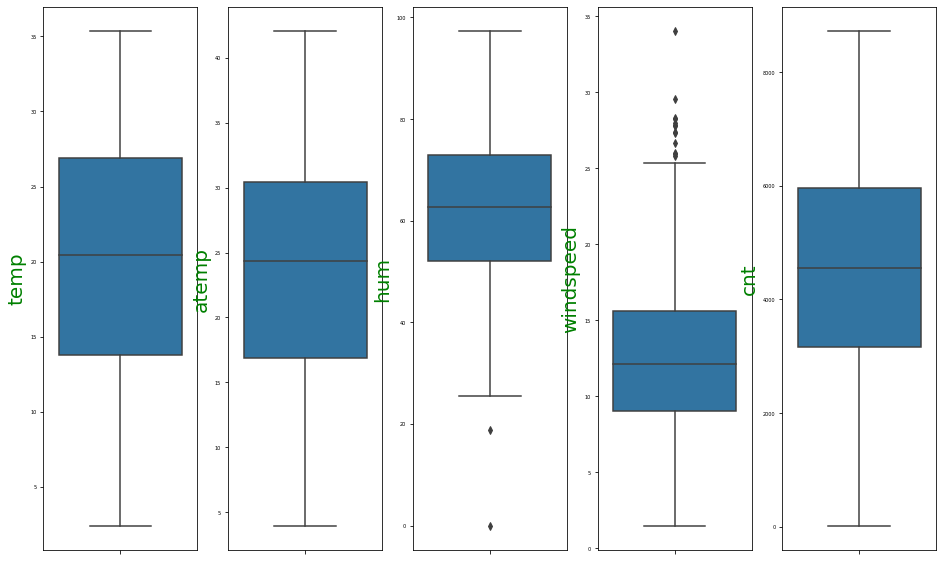

In [19]:
cont_col = ["temp","atemp", "hum","windspeed","cnt"]
cont_col

plt.rcParams["figure.figsize"] = (16,10)

i = 1
for col in cont_col:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=df)
    plt.yticks(size=5)
    plt.ylabel(col,fontdict={"size":20, "color":"green"})
    i+=1

**insight**

- From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

## 4. Perform EDA

**1. converting numerical data into categorical data variables**

- season :  (1:spring, 2:summer, 3:fall, 4:winter)
- yr :  (0: 2018, 1:2019)
- mnth :  ( 1 to 12)
- weekday : day of the week
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [20]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [21]:
# #replacing values
df.season.replace([1,2,3,4],["spring","summer","fall","winter"] , inplace=True)
df.yr.replace([0,1,],[2018,2019], inplace=True)
df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12], ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],inplace=True)
df.weekday.replace([0,1,2,3,4,5,6],["sun","mon","tue","wed","thu","fri","sat"],inplace=True)
df.weathersit.replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.holiday.replace([0, 1],["Holiday", "Workingday"], inplace=True)
df.workingday.replace([0, 1],["Holiday", "Non-Holiday"], inplace=True)

In [22]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,Holiday,mon,Non-Holiday,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,Holiday,tue,Non-Holiday,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801


#### 1. cnt value with time ( Time series Analysis )

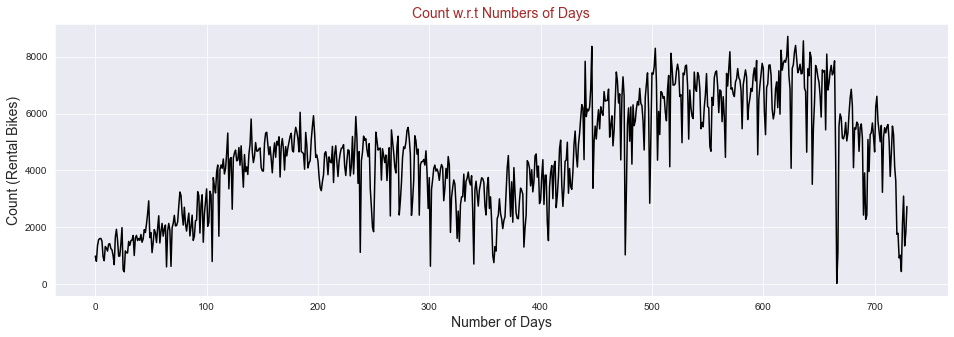

In [23]:
def timeseries(i):
    sns.set_style("darkgrid")
    for i in i:
        plt.figure(figsize=(16,5))
        plt.title("Count w.r.t Numbers of Days",size=14, color="brown")
        plt.xlabel("Number of Days", size=14)
        plt.ylabel("Count (Rental Bikes)", size=14)
        plt.plot(df[i], color="k")
        plt.show()
        
timeseries(["cnt"])

##### 2. Draw pair plots to checking linear relationship


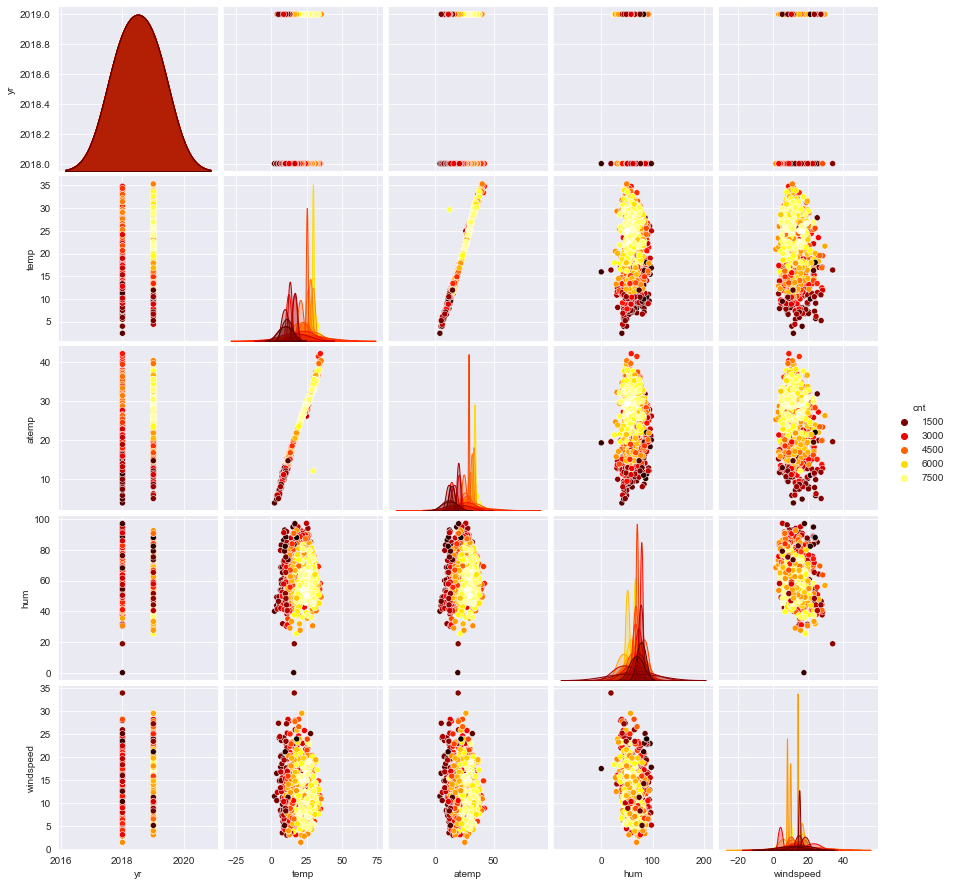

In [24]:
#pairplot for understanding the relation
sns.pairplot(df, hue="cnt",palette='hot')

plt.show()

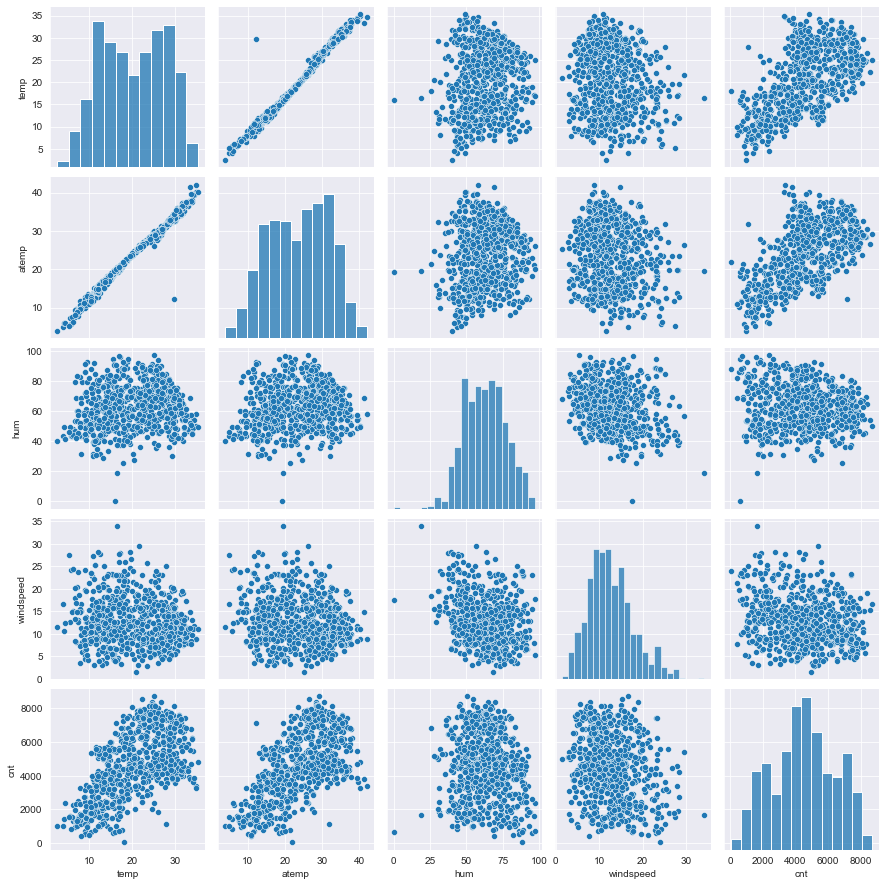

In [25]:
# pairplot for numeriacal value
sns.pairplot(data=df[cont_col])
plt.show()

**insight**
- From the pairplots we can clearly conclude that there is a relation among 'temp', 'atemp' & 'cnt'.

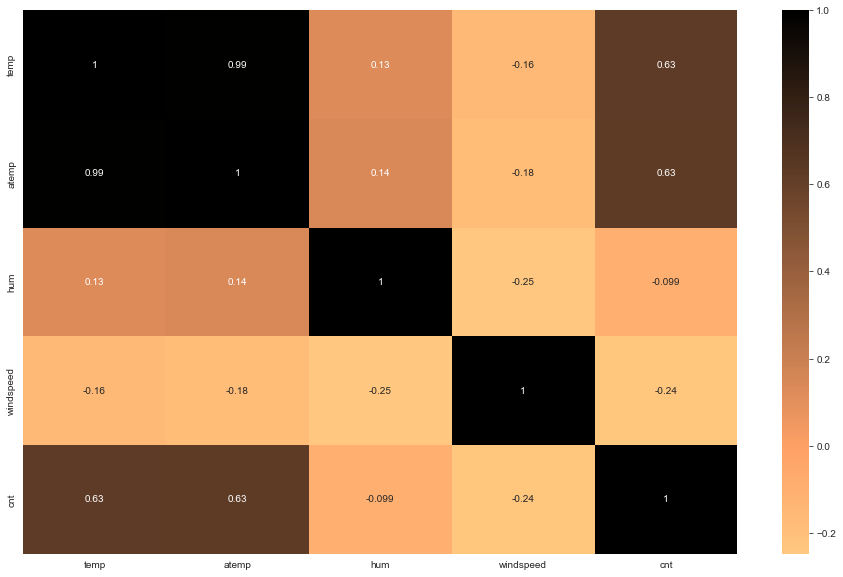

In [26]:
sns.heatmap(df[cont_col].corr(), annot=True, cmap="copper_r")
plt.show()

**insight** 
- Here we can see that **temp** and **atemp** has correlation more than **0.99** means almost **1 (highly correlated)** and atemp seems to be derived from temp so atemp field can be dropped here only

#### 3. Visualising categorical variables using boxplots

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 90.3+ KB


In [28]:
df.weathersit.replace(["Light rain_Light snow_Thunderstorm"],["Light_rain_Light_snow_Thunderstorm"], inplace=True)

In [29]:
df.weathersit.value_counts()

Clear_Few Clouds                      463
Mist_cloudy                           246
Light_rain_Light_snow_Thunderstorm     21
Name: weathersit, dtype: int64

In [30]:
df.workingday.value_counts()

Non-Holiday    504
Holiday        226
Name: workingday, dtype: int64

In [31]:
obj_col = list(df.select_dtypes(include=["object"]))

In [32]:
obj_col

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

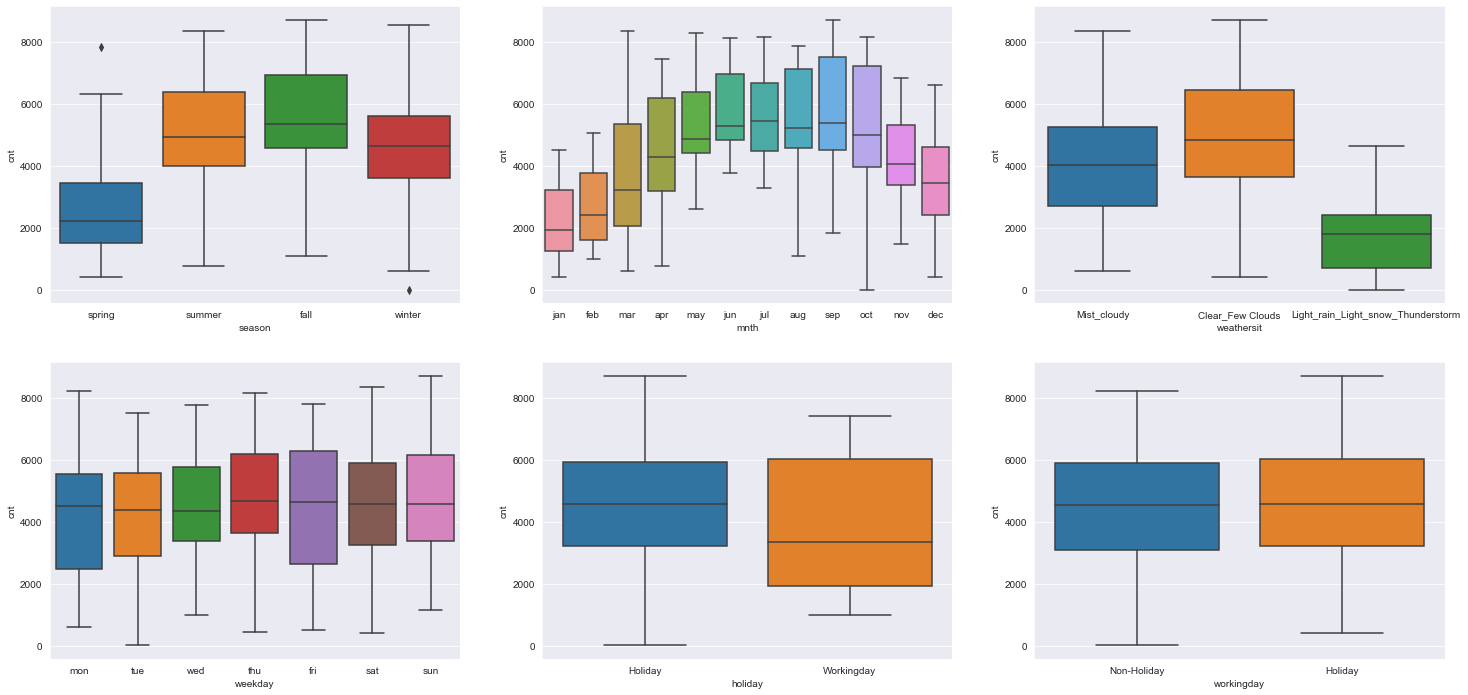

In [33]:
# Building boxplot for each categories using subplots
# using all categories  vs cnt for better understanding

plt.figure(figsize=(25,12))

cat_vars = ["season", "mnth","weathersit","weekday","holiday","workingday"] 

i = 1
for var in cat_vars:
    
    plt.subplot(2,3,i)
    sns.boxplot(x=var, y = "cnt", data=df)
    i+=1
    
plt.savefig("Categorical variables vs cnt plot")

In [34]:
df.workingday.value_counts()

Non-Holiday    504
Holiday        226
Name: workingday, dtype: int64

In [35]:
# df.weathershit.value_counts()
df.weathersit.value_counts()

Clear_Few Clouds                      463
Mist_cloudy                           246
Light_rain_Light_snow_Thunderstorm     21
Name: weathersit, dtype: int64

**insight**


- 1. **season** -  the demand of rental bikes is highest in fall (autumn) season. the demand is 4500+ ( for the 2 Years period only).

- 2. **mnth**   -  the demand of the bikes continusoly increasing upto **july** month, and the highest demand in the **july** and **september** month. After the  **september** month demand of bikes is decreasing

- 3. **weathershit** - clear weathershit has highest demand and lowest demand in the thunderstorm weather.

- 3. **weathershit** - clear weathershit has highest demand and lowest demand in the thunderstorm weather.

- 4. **weekday** - in weekday trend is very closer between 4000 - 5000

- 5. **holiday** - when holiday is occur demand has Increased as compared to Non Holiday.

- 6. **workingday** - maximum booking happening between 4000-5000.

#### 4. ploting a scatter plot

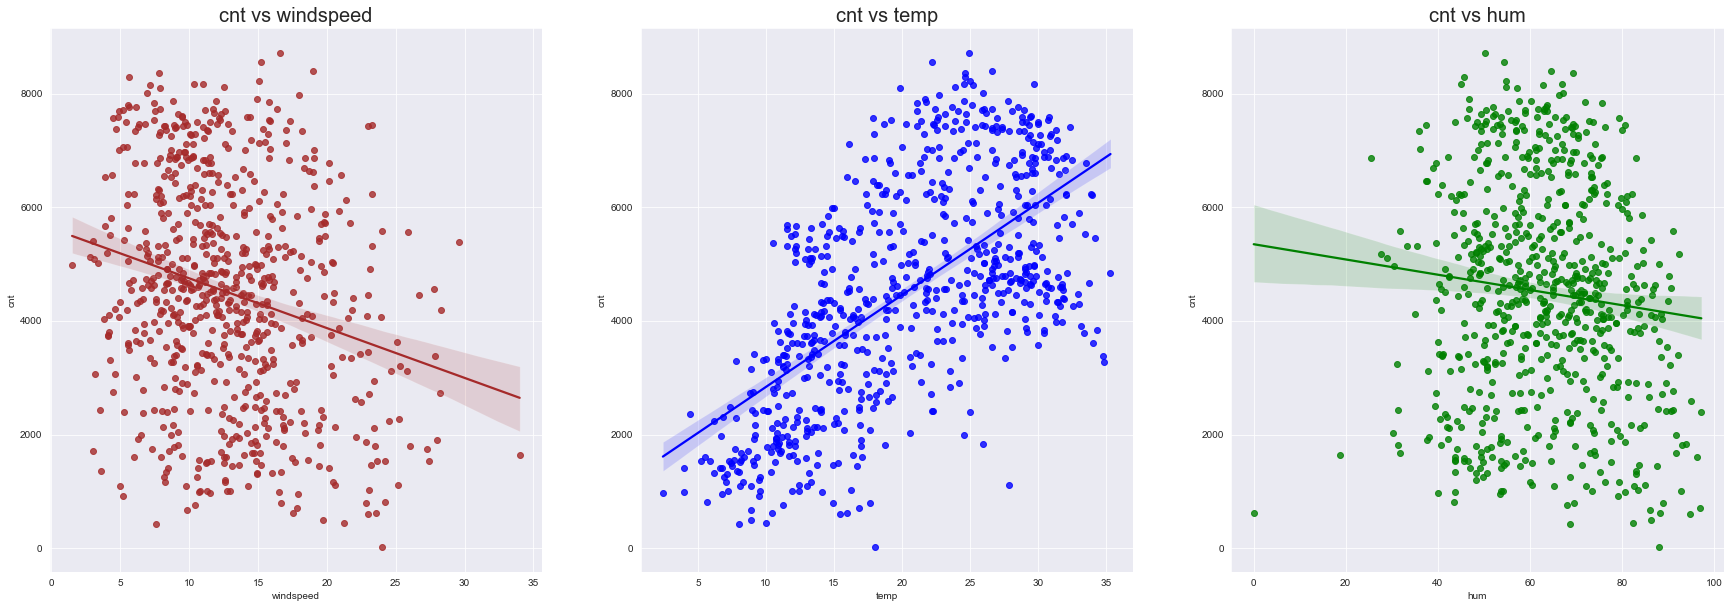

In [36]:
#ploting scatter plot using regression line
# 1. releationship between cnt vs windspeed
# 2. releationship between cnt vs temp
# 3. releationship between cnt vs hum

plt.figure(figsize=(30,10))

plt.subplot(1, 3 , 1)
plt.title("cnt vs windspeed", size=20)
sns.regplot(data=df, x="windspeed", y="cnt",color="brown")

plt.subplot(1, 3 , 2)
plt.title("cnt vs temp", size=20)
sns.regplot(data=df, x="temp", y="cnt",color="b")

plt.subplot(1, 3 , 3)
plt.title("cnt vs hum", size=20)
sns.regplot(data=df, x="hum", y="cnt",color="g" )

plt.show()

**insight**

* In Plot 1 

i) count (cnt) is decreasing with increasing in windspeed   
ii) windspeed value is more scatterd around

* In Plot 2 

i) cnt is giving linear relationship with temp 
ii) count increasing when temp is increasing
iii)  cnt is less scatter than ohters two

* In Plot 3 

i) cnt is decreasing with increasing in humidity.    
ii) humidity value are more scattered

## 5 Data Preprations 

In [37]:
#for showing all columns name
pd.options.display.max_columns = None

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 90.3+ KB


#### 1. Creating Dummy variables for categorical data 

In [39]:
# new dataframe for prevent the data loss
bike = df

# there are three things 
# 1. Creating dummy variables
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.
bike_df = pd.get_dummies(bike, columns=["season", "mnth","weathersit","yr","weekday","holiday","workingday"],drop_first=True)
bike_df.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light_rain_Light_snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,holiday_Workingday,workingday_Non-Holiday
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
bike_df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'weathersit_Light_rain_Light_snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'yr_2019', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'holiday_Workingday', 'workingday_Non-Holiday'],
      dtype='object')

In [41]:
# information after creating dummy variable

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   temp                                           730 non-null    float64
 1   atemp                                          730 non-null    float64
 2   hum                                            730 non-null    float64
 3   windspeed                                      730 non-null    float64
 4   cnt                                            730 non-null    int64  
 5   season_spring                                  730 non-null    uint8  
 6   season_summer                                  730 non-null    uint8  
 7   season_winter                                  730 non-null    uint8  
 8   mnth_aug                                       730 non-null    uint8  
 9   mnth_dec                                       730 non

# 6. Model Building

In [42]:
import sklearn as sk
# [x for x in dir(sk.feature_selection)]

In [58]:
# SCIKIT LIBRARIES

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# stats model library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:

#shape of dataset before spiliting 
bike_df.shape

(730, 30)

### 1. Split Data into training and test 

In [45]:
# y to contain target variable, dependent variable
y = bike_df.pop("cnt")

# all remaining variable also our independent variables
x = bike_df

In [46]:
x.columns.tolist()

['temp',
 'atemp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_aug',
 'mnth_dec',
 'mnth_feb',
 'mnth_jan',
 'mnth_jul',
 'mnth_jun',
 'mnth_mar',
 'mnth_may',
 'mnth_nov',
 'mnth_oct',
 'mnth_sep',
 'weathersit_Light_rain_Light_snow_Thunderstorm',
 'weathersit_Mist_cloudy',
 'yr_2019',
 'weekday_mon',
 'weekday_sat',
 'weekday_sun',
 'weekday_thu',
 'weekday_tue',
 'weekday_wed',
 'holiday_Workingday',
 'workingday_Non-Holiday']

In [47]:
x

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light_rain_Light_snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,holiday_Workingday,workingday_Non-Holiday
0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
726,10.386653,12.75230,59.0000,10.416557,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
727,10.386653,12.12000,75.2917,8.333661,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
728,10.489153,11.58500,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [48]:
# Now creating train, test data frame with 70:30 Ratio 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, train_size=0.7, random_state=100)

In [49]:
# checking the shape of data frame 
display(X_train.shape)

(510, 29)

In [50]:
# checking the shape of data frame
display(X_test.shape)

(219, 29)

In [51]:
# describe the X_train
print(X_train.describe())

             temp       atemp         hum   windspeed  season_spring  \
count  510.000000  510.000000  510.000000  510.000000     510.000000   
mean    20.102429   23.493909   63.112926   12.831318       0.243137   
std      7.431169    8.090038   14.156632    5.291832       0.429398   
min      2.424346    3.953480    0.000000    2.834381       0.000000   
25%     13.606865   16.603063   52.270825    9.041918       0.000000   
50%     20.209597   24.020400   63.437500   12.083182       0.000000   
75%     26.615847   30.177700   73.250025   15.750879       0.000000   
max     35.328347   42.044800   97.041700   34.000021       1.000000   

       season_summer  season_winter    mnth_aug    mnth_dec    mnth_feb  \
count     510.000000      510.00000  510.000000  510.000000  510.000000   
mean        0.245098        0.24902    0.096078    0.084314    0.066667   
std         0.430568        0.43287    0.294988    0.278131    0.249689   
min         0.000000        0.00000    0.000000    

In [52]:
# describe the X_test
print(X_test.describe())

             temp       atemp         hum   windspeed  season_spring  \
count  219.000000  219.000000  219.000000  219.000000     219.000000   
mean    20.815737   24.255828   61.961883   12.600130       0.255708   
std      7.689600    8.299641   14.456669    4.984858       0.437258   
min      3.957390    4.941955   25.416700    1.500244       0.000000   
25%     14.093750   17.085500   51.166700    9.021282       0.000000   
50%     20.807500   24.873150   60.916700   12.167200       0.000000   
75%     27.401653   31.155725   72.192050   15.395629       1.000000   
max     34.815847   41.318550   97.250000   27.999836       1.000000   

       season_summer  season_winter    mnth_aug    mnth_dec    mnth_feb  \
count     219.000000     219.000000  219.000000  219.000000  219.000000   
mean        0.264840       0.232877    0.059361    0.086758    0.100457   
std         0.442259       0.423633    0.236840    0.282125    0.301297   
min         0.000000       0.000000    0.000000    

**insight**

- After the splitting the data shape of the dataframe is **changed**
- Dataset is divided into **70:30** ratio

In [73]:
## Using MinMax scaler
sc = StandardScaler()
sc.fit_transform(X_train,y_train)

array([[-0.1213349 , -0.05587772, -0.51472505, ...,  2.52810291,
        -0.16173108,  0.63636364],
       [ 1.23173122,  1.19410647,  0.51643254, ...,  2.52810291,
        -0.16173108,  0.63636364],
       [-0.42047849, -0.34883368, -0.06985388, ..., -0.39555352,
        -0.16173108, -1.57142857],
       ...,
       [-1.48320423, -1.38677527, -1.47132851, ..., -0.39555352,
        -0.16173108,  0.63636364],
       [-1.28110586, -1.36416976, -0.49704814, ..., -0.39555352,
        -0.16173108,  0.63636364],
       [-0.3306349 , -0.3720764 ,  0.75135155, ...,  2.52810291,
        -0.16173108,  0.63636364]])

In [81]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [85]:
lr.coef_

array([  105.73583855,    10.59224417,   -14.13027643,   -50.51842035,
        -383.2935099 ,   362.94610196,   960.30862175,   200.21339835,
        -397.09811992,  -323.14500633,  -551.51538062,  -294.76136886,
          18.63913697,     6.99769668,   215.25713103,  -360.97552102,
          51.47465913,   753.7691151 , -2180.83908805,  -515.53016263,
        2007.26798737,  -214.41496393,  -489.4388491 ,  -437.27132188,
          33.38526151,  -228.95562934,   -97.75730515, -1175.55328279,
        -529.14902322])

In [77]:
lr.intercept_

3568.5622891877647

In [104]:
# prediction on the model 

y_pred = lr.predict(X_test)
y_pred

array([ 3540.1221884 ,  7743.61025574,  3766.61824404,  5378.55784712,
        5210.81141562,  3946.22667108,  4335.66066802,  3927.34861526,
        6307.07137841,  4816.38266773,  7143.18785173,  5985.52587597,
        4323.71159227,  6222.83125744,  1302.58644767,  6991.58357837,
        5308.01754002,  1438.12816009,  5356.02495477,  5185.40233519,
        7290.54475946,  5337.48892253,  7080.37317272,  1204.1746856 ,
        3563.33397535,  4633.62514711,  7345.6781182 ,  4392.03334279,
        7429.23999389,  4214.59336824,  6940.84403571,  6385.5234141 ,
        4356.57458523,  5475.18417436,  1488.53577339,  4243.81791225,
        4592.19351982,  6255.55035482,  1134.08434921,  3936.39314563,
        4292.68519814,  3060.45856246,  5774.82131164,  5216.52221197,
        5574.07641653,  7040.8410248 ,  1904.84019091,  5414.28903258,
        4992.46004935,  2377.40965897,  6855.31655399,  4034.72904416,
        4884.10125847,  7418.88261066,  3314.06501315,  7168.42015128,
      

## 9. Making Prediction 

**1. Predicting value on test dataset**

In [114]:
# predict the value
f_cols = ['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sep', 'weathersit_Light_rain_Light_snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'yr_2019', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'holiday_Workingday', 'workingday_Non-Holiday']

y_test_pred = lr.predict(X_test[f_cols])

In [115]:
y_test_pred

array([ 3540.1221884 ,  7743.61025574,  3766.61824404,  5378.55784712,
        5210.81141562,  3946.22667108,  4335.66066802,  3927.34861526,
        6307.07137841,  4816.38266773,  7143.18785173,  5985.52587597,
        4323.71159227,  6222.83125744,  1302.58644767,  6991.58357837,
        5308.01754002,  1438.12816009,  5356.02495477,  5185.40233519,
        7290.54475946,  5337.48892253,  7080.37317272,  1204.1746856 ,
        3563.33397535,  4633.62514711,  7345.6781182 ,  4392.03334279,
        7429.23999389,  4214.59336824,  6940.84403571,  6385.5234141 ,
        4356.57458523,  5475.18417436,  1488.53577339,  4243.81791225,
        4592.19351982,  6255.55035482,  1134.08434921,  3936.39314563,
        4292.68519814,  3060.45856246,  5774.82131164,  5216.52221197,
        5574.07641653,  7040.8410248 ,  1904.84019091,  5414.28903258,
        4992.46004935,  2377.40965897,  6855.31655399,  4034.72904416,
        4884.10125847,  7418.88261066,  3314.06501315,  7168.42015128,
      

**2. Making prediction on Train data**

In [120]:
# predict the value
f_cols = ['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sep', 'weathersit_Light_rain_Light_snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'yr_2019', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'holiday_Workingday', 'workingday_Non-Holiday']

y_train_pred = lr.predict(X_train[f_cols])

In [121]:
y_train_pred

array([6559.07448168, 6272.43699857, 4567.85877971, 3143.19757018,
       5416.80004106, 2564.48928054, 7167.50639687, 7062.82241267,
       6481.49684461, 5535.28051624, 4937.80706774, 7677.48586307,
       3808.00582685, 6527.37072764, 4707.49460919, 6908.21859543,
       6024.53174294, 4753.90436923, 4893.29753621, 4654.10654725,
       4816.20322756, 5338.18833959, 6849.51071866, 5419.74882789,
       2697.75965248, 6914.99924822, 3462.53957884, 6383.07981374,
       6246.65475546, 4780.14513336, 4056.34508016, 4395.37376213,
       5255.24135089, 3520.80324736, 4805.12441174, 5426.67787014,
       2706.06683146, 4629.89762571, 6844.66229172, 6795.61716755,
       5275.04979689, 3479.16889689, 3786.61132913, 1412.365189  ,
       6430.96817374, 4772.85009149, 5711.19856172, 6478.21967678,
       5219.37967473, 6969.77373429, 4629.00868547, 6813.0635483 ,
       5040.06958834, 4083.0171547 , 5316.8395142 , 4942.58187335,
       6517.93553933, 4890.6474075 , 7486.35234926, 6256.46524

## 9. Evaluating the Model

### 1. R2 Score 

#### 1. R2 Score (test data)

In [126]:
#evaluating the model based on r2_score
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8292872865932331

#### 2. R2 Score (train data)

In [127]:
#evaluating the model based on r2_score
r2_score(y_train, y_train_pred)

0.8509336685427461

Text(0, 0.5, 'y_pred')

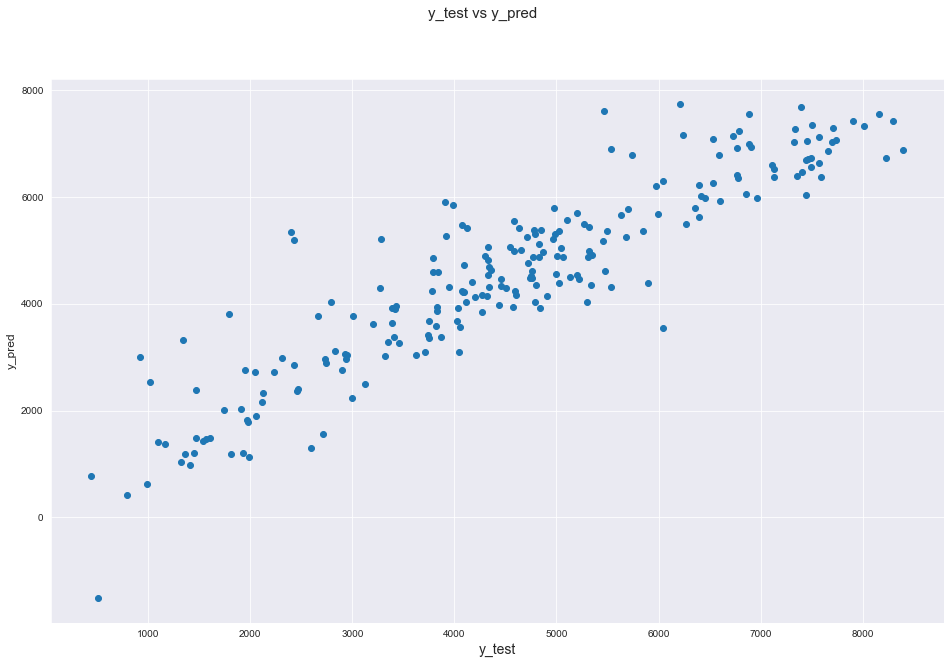

In [128]:
# Homoscedescidity 
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

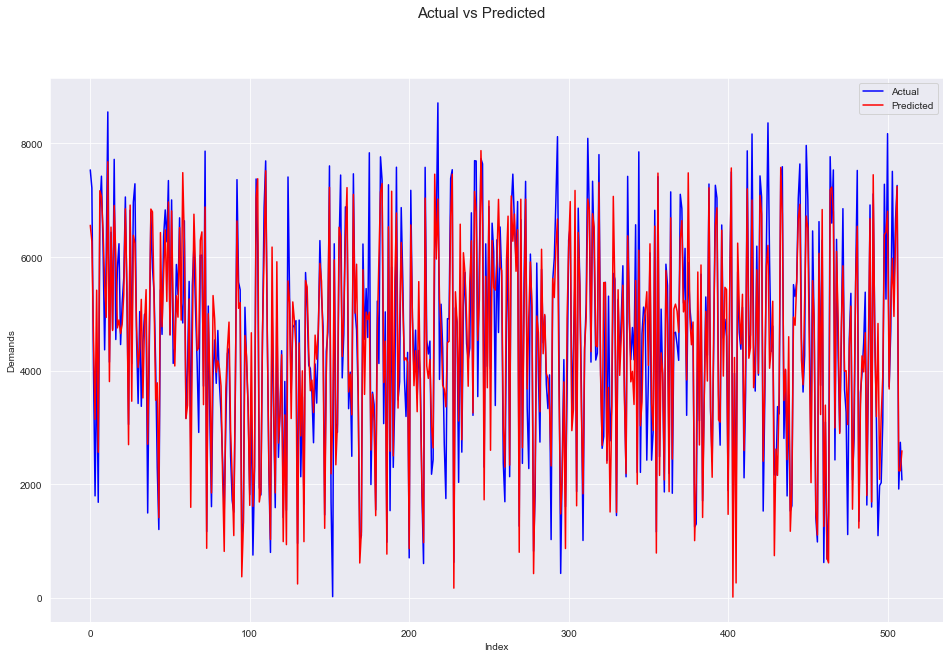

In [135]:
# actual vs predicted 

plt.rcParams["figure.figsize"] = (16,10)
c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, y_train,color="b")
plt.plot(c, y_train_pred,color="r")
plt.suptitle("Actual vs Predicted", fontsize=15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.legend(["Actual","Predicted"])
plt.show()

## Final Report 

In [ ]:
lr_model6.summary()

###### The demand of the bike rental depend on the  FACTOR on below variables:

- **demand increase**- in the month of 1,2,3,4,5,6,7,9, yr, clear_few_cloud_weathersit, summer, fall, Holiday

- **demand decrease**- if it NON-holiday, light_snow_light_thunderstrom, misty cloud

### Final Recommendations is 

**Demand is higher in month of 2,3,4,5,6,7 and 9**